# FERM 533 Assignment I

In [148]:
# Let's start with importing the necessary libraries as we go
import yfinance as yf
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

### a) Plot the stock price over time.

In [149]:
def plot_stock_price(ticker, start_date):
    # Download stock data from Yahoo Finance
    stock_data = yf.download(ticker, start=start_date, interval='1mo')

    # Resample data to monthly frequency
    stock_data['Returns'] = stock_data['Adj Close'].pct_change().dropna()

    # Plot the stock price
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['Adj Close'], linestyle='-')
    plt.title(f'{ticker} Stock Price (Monthly)')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)
    plt.show()

[*********************100%***********************]  1 of 1 completed


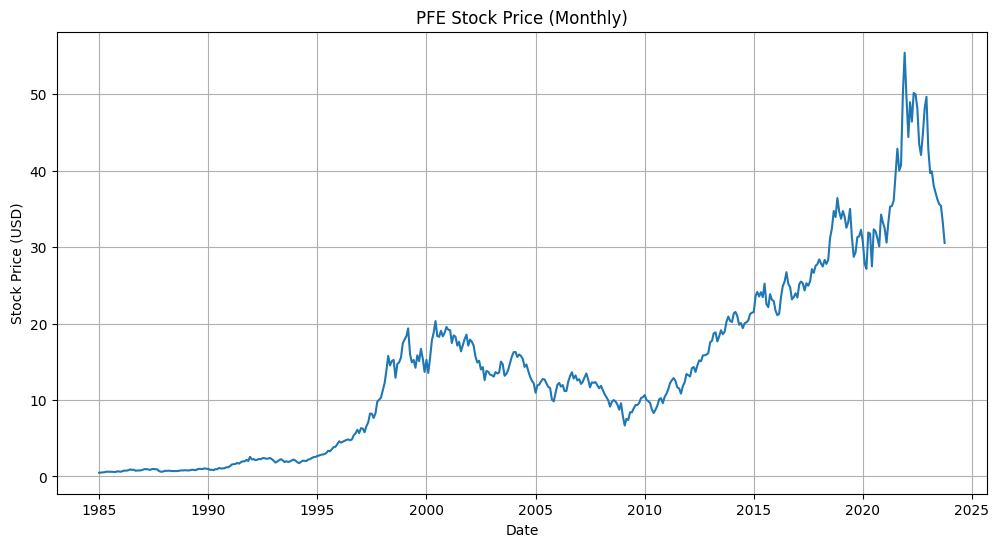

In [150]:
plot_stock_price("PFE", "1983-01-01")

### b) Calculate the monthly returns and plot them.

### c) Provide summary statistics for monthly returns

Did these parts in one go, since it's easier to give out summary of returns in the same function.

In [151]:
def calculate_monthly_returns(ticker, start_date):
    # Download stock data from Yahoo Finance
    stock_data = yf.download(ticker, start=start_date, interval='1mo')

    # Resample data to monthly frequency
    stock_data['Returns'] = stock_data['Adj Close'].pct_change().dropna()

    # Print summary
    print("\nSummary of Monthly Returns:")
    print(stock_data['Returns'].describe())
    
    return stock_data['Returns']

def plot_monthly_returns(ticker, start_date):
    # Calculate monthly returns
    monthly_returns = calculate_monthly_returns(ticker, start_date)

    # Plot the monthly returns
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_returns, linestyle='-')
    plt.title(f'{ticker} Monthly Returns')
    plt.xlabel('Date')
    plt.ylabel('Monthly Returns')
    plt.grid(True)
    plt.show()

[*********************100%***********************]  1 of 1 completed

Summary of Monthly Returns:
count    465.000000
mean       0.011276
std        0.068434
min       -0.240073
25%       -0.031047
50%        0.010675
75%        0.053485
max        0.271708
Name: Returns, dtype: float64


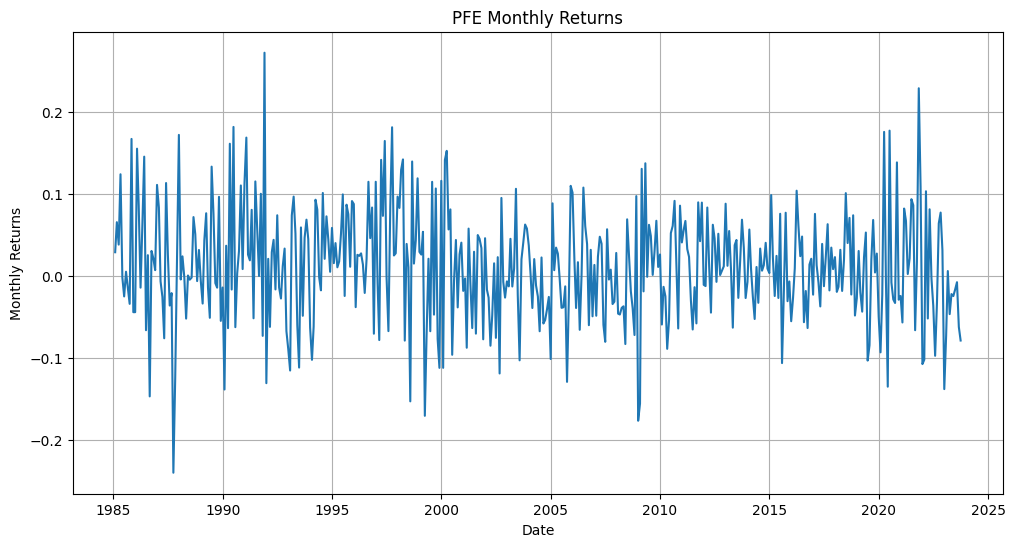

In [153]:
plot_monthly_returns("PFE", "1983-01-01")

### d) Regress PFE returns on S&P500 (ticker ^GSPC) returns. Write out the fitted regression model.

In [ ]:
# We need to add the additional library statsmodels at this point
import statsmodels.formula.api as smf

In [154]:
def regress_returns(stock_ticker, benchmark_ticker, start_date):
    # Download stock and benchmark data from Yahoo Finance
    stock_data = yf.download(stock_ticker, start=start_date, interval='1mo')
    stock_data['Returns'] = stock_data['Adj Close'].pct_change()
    benchmark_data = yf.download(benchmark_ticker, start=start_date, interval='1mo')
    benchmark_data['Returns'] = benchmark_data['Adj Close'].pct_change()
    merged_data = stock_data[['Returns']].join(benchmark_data['Returns'].rename('Benchmark_Returns')).dropna()

    # Fit the regression model, use Ordinary Least Squares
    model = smf.ols("Returns ~ Benchmark_Returns", data=merged_data).fit()

    # Print out the regression results
    print(model.summary())

In [156]:
regress_returns("PFE", "^GSPC", "1983-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     176.1
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           2.77e-34
Time:                        14:01:55   Log-Likelihood:                 662.71
No. Observations:                 465   AIC:                            -1321.
Df Residuals:                     463   BIC:                            -1313.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.02

### e) Comment on the statistical significance of the estimated regression coefficients.

### Comment:

Upon taking a look at the coefficient of Benchmark_Returns = 0.8161, we can comment that on average, when a single-unit increase in S&P500 occurs, Pfizer Inc. returns are expected to increase by 0.8161 units. We can say that Pfizer is less volatile compared to the benchmark.

R-Squared =  0.276 tells us that approximately 27.6% of the variability in Pfizer Inc. returns can be explained by S&P500's returns.

Low P-value 0.00.. of benchmark indicates that the coefficient is very close to zero, meaning that there's a statistical significance.

Standard error for Benchmark_Returns = 0.062, which indicates a low level of variability in the impact of S&P500 on the returns of Pfizer Inc. 

### f) Build a 95% confidence interval for the coefficient of S&P 500 returns.

In [157]:
def conf_int95(stock_ticker, benchmark_ticker, start_date):
    # Download stock and benchmark data from Yahoo Finance
    stock_data = yf.download(stock_ticker, start=start_date, interval='1mo')
    stock_data['Returns'] = stock_data['Adj Close'].pct_change()
    benchmark_data = yf.download(benchmark_ticker, start=start_date, interval='1mo')
    benchmark_data['Returns'] = benchmark_data['Adj Close'].pct_change()
    merged_data = stock_data[['Returns']].join(benchmark_data['Returns'].rename('Benchmark_Returns')).dropna()

    # Fit the regression model, use Ordinary Least Squares
    model = smf.ols("Returns ~ Benchmark_Returns", data=merged_data).fit()
    interval_95 = model.conf_int(alpha=0.05).loc['Benchmark_Returns']
    print(f'95% Confidence Interval for the Coefficient of S&P 500 Returns: \n {interval_95}')

In [158]:
conf_int95("PFE", "^GSPC", "1983-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
95% Confidence Interval for the Coefficient of S&P 500 Returns: 
 0    0.695273
1    0.936995
Name: Benchmark_Returns, dtype: float64


### g) Now, let’s drop S&P 500 returns and run a simpler regression. Devise an appropriate regression and test if PFE has a different average return level in January compared to other months. What do you conclude?

In [163]:
def simple_regression(stock_ticker, start_date):
    stock_data = yf.download(stock_ticker, start=start_date, interval='1mo')
    stock_data['Returns'] = stock_data['Adj Close'].pct_change()

    # Create a dummy variable for January
    stock_data['Is_January'] = (stock_data.index.month == 1).astype(int)

    # Run regression
    model = smf.ols("Returns ~ Is_January", data = stock_data.dropna()).fit()

    # Print regression summary
    print(model.summary())

In [164]:
simple_regression('PFE', '1983-01-01')

[*********************100%***********************]  1 of 1 completed
                            OLS Regression Results                            
Dep. Variable:                Returns   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3105
Date:                Tue, 31 Oct 2023   Prob (F-statistic):              0.578
Time:                        14:12:49   Log-Likelihood:                 587.93
No. Observations:                 465   AIC:                            -1172.
Df Residuals:                     463   BIC:                            -1164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

### Comment:

Is_January returned a coefficient of -0.0065 and p-value 0.578

So we have a small negative change in January, but our p-value is a bit larger than the commonly used significance level of 0.05 for 95% confidence rate. 

Therefore we are unable to pinpoint a significant change in January compared to other months.

### h) Calculate the average return for each calendar month, i.e., average return in January, average return in February, etc., and report them. Do you see any pattern?


In [165]:
# We need interactive plots to view the average percentage returns on each month
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [166]:
def Seasonality_Dynamic(ticker, start=None, end=None):

    if start == None:
        start = "2020-01-01"
    else:
        start = start
    if end == None:
        end = date.today()
    else:
        end = end
        
    price = yf.download(ticker, start, end)
    df = pd.DataFrame({'return': price['Close'].pct_change().fillna(0)})

    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df = df[df.index >= df[df.index.month == 1].index[0]]
    df = df[df.index <= df[df.index.month == 12].index[-1]]
    
    # Seasonal data
    seasonal_data = {}
    for year in df.index.year.unique():
        seasonal_data[year] = df[df.index.year == year].reset_index()['return']
    seasonal_data = pd.DataFrame(seasonal_data)
    
   # Monthly Cumulative Returns
    year_long = seasonal_data[-1:].T.dropna().index[0]
    seasonal_data.index = df[df.index.year == year_long].index.strftime('%Y%m')
    seasonal_returns = seasonal_data.dropna(how='all').groupby(seasonal_data.index).cumsum()
    seasonal_returns.reset_index(drop=True, inplace=True)
    seasonal_returns = seasonal_returns.dropna(how='all').mean(axis=1) 
    
    # Monthly Data Summary
    monthly = {}
    for year in df.index.year.unique():
        yeardf = df[df.index.year == year]
        monthly[year] = yeardf.groupby(yeardf.index.month).sum() * 100

    data = pd.concat(monthly, axis=1)
    data.columns = [col[0] for col in data.columns]
    data.index = months

    summary = pd.DataFrame(data.mean(axis=1))
    summary.columns = ['Return %']
    
    # Create a line plot using plotly.graph_objs
    fig = go.Figure()

    # Add a line trace for the summary data
    fig.add_trace(go.Scatter(
        x=summary.index,
        y=summary['Return %'].round(2),
        mode='lines+markers',
        name='Monthly Returns',
        line=dict(color='green'),
        marker=dict(size=8, color='green')
    ))

    # Set plot title and axis labels
    fig.update_layout(
        title=f'Seasonal Chart : {ticker}',
        xaxis=dict(title='Month'),
        yaxis=dict(title='Return %'),
        template='plotly_dark'
    )
    # Add a zero line to the plot
    fig.add_shape(
        type="line",
        x0=summary.index[0],
        y0=0,
        x1=summary.index[-1],
        y1=0,
        line=dict(color="red", dash="dash")
    )

    # Show the plot
    fig.show()
    
    data_df = pd.DataFrame(data.T)
    return data_df

[*********************100%***********************]  1 of 1 completed


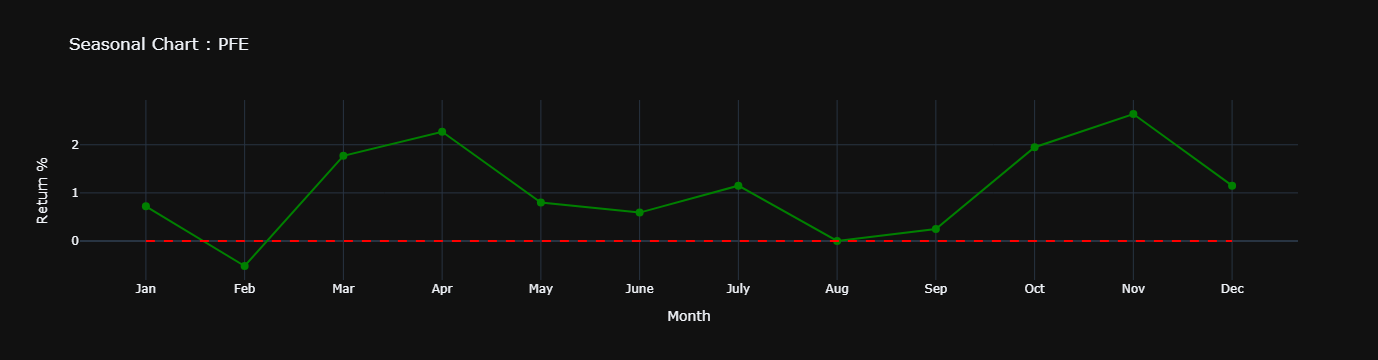

,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
1983,1.255322,2.441968,8.231909,8.388383,-6.499917,13.423365,-11.618560,-0.583070,4.174696,-2.609789,-4.002651,-3.111432
1984,-0.711208,5.981970,-9.021567,-0.749706,-5.196215,2.864658,-1.226089,11.113403,-1.973759,8.930454,2.181554,8.194575
1985,-6.160079,2.020494,6.614081,3.813289,11.872271,-0.830430,-2.206520,-0.040167,-1.351723,-3.210914,15.658595,-4.859722
1986,-4.140761,13.810818,8.473112,-1.096428,6.187675,13.138376,-6.479461,2.003885,-15.521456,3.149303,2.298006,0.235086
1987,10.773091,7.747234,-0.483863,-2.112140,-7.692380,10.228675,2.719818,-4.206759,-2.015407,-23.306666,-12.426359,2.268564
1988,16.759603,-0.183784,1.626093,0.346753,-5.033555,-0.779767,-0.365089,-1.110820,7.051417,5.047939,-0.596625,2.303494
1989,-0.576586,-4.316733,4.284063,7.453672,-1.264090,-5.837867,12.680274,6.550658,-0.793703,-1.295272,9.325785,-6.077349
1990,-1.271112,-14.269817,3.104444,-6.392854,15.235959,-2.608139,16.954097,-5.971118,-0.328868,3.439977,10.647836,0.068097
1991,10.993950,15.914281,2.152926,2.156512,8.129592,-5.531608,11.038876,5.967911,-0.288862,9.754074,-7.376435,24.072593
1992,-13.589705,2.416090,-6.806130,3.344213,4.503720,-1.823671,7.240571,-1.309666,-3.048303,1.358827,3.471445,-7.254655


In [167]:
Seasonality_Dynamic("PFE", "1983-01-01")

### We can see that Pfizer Inc. promts the best returns on April (2.27%) and November (2.64%), along with worst drawdowns shown at February (-0.52%).